# <center>Cancer classification</center>
Dataset downloaded from [Kaggle](https://www.kaggle.com/datasets/erdemtaha/cancer-data)
## Getting to know the data

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import optuna
import plotly.figure_factory as ff

In [23]:
# Imported modules parameters
sns.set_style('darkgrid')
plt.style.use('dark_background')
pio.templates.default = 'plotly_dark'
pio.renderers.default = 'png'

In [5]:
data = pd.read_csv('data/Cancer_Data.csv', sep=',')
data.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
88,861597,B,12.360,21.80,79.78,466.1,0.08772,0.09445,0.06015,0.03745,...,13.83,30.50,91.46,574.7,0.1304,0.2463,0.24340,0.12050,0.2972,0.09261
18,849014,M,19.810,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,...,27.32,30.88,186.80,2398.0,0.1512,0.3150,0.53720,0.23880,0.2768,0.07615
142,869218,B,11.430,17.31,73.66,398.0,0.10920,0.09486,0.02031,0.01861,...,12.78,26.76,82.66,503.0,0.1413,0.1792,0.07708,0.06402,0.2584,0.08096
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,...,14.50,20.49,96.09,630.5,0.1312,0.2776,0.18900,0.07283,0.3184,0.08183
505,915276,B,9.676,13.14,64.12,272.5,0.12550,0.22040,0.11880,0.07038,...,10.60,18.04,69.47,328.1,0.2006,0.3663,0.29130,0.10750,0.2848,0.13640


Cancer Types:
1. Benign cancer (B)
2. Malignant cancer (M)

In [13]:
data.info()
display(
    data.describe(exclude=object).T,
    data.describe(include=object).T
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


,count,unique,top,freq
diagnosis,569,2,B,357


### Duplicates in data

In [15]:
dupl = data.drop(columns=['id']).duplicated().sum()
print(f'Total duplicates(exclude id): {dupl}')

Total duplicates(exclude id): 0


### NaN's count

In [21]:
print(f"Total NaN's: {data.isna().sum().sum()}")

Total NaN's: 0


## Visualisation

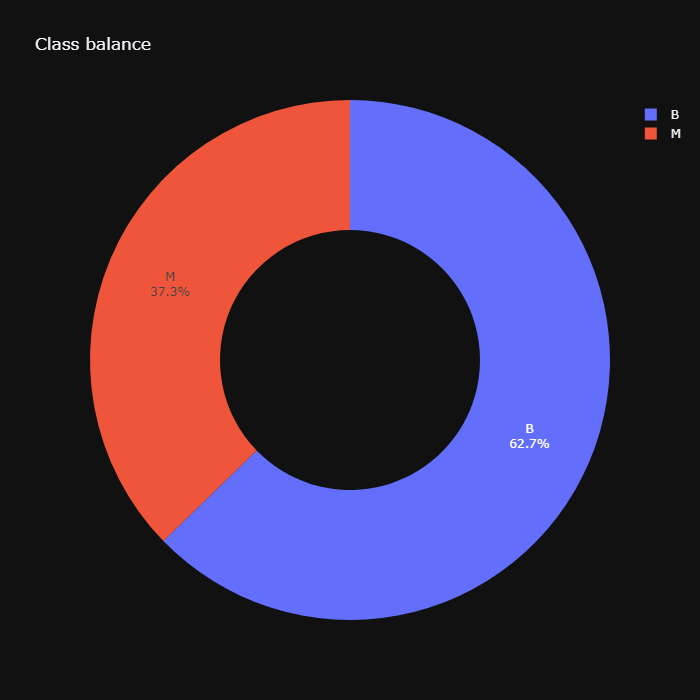

In [25]:
diagnosis_pie = px.pie(
    data,
    names='diagnosis',
    width=700,
    height=700,
    hole=0.5,
    title='Class balance'
)
diagnosis_pie.update_traces(textinfo='percent+label')